In this exercise, the Pima Indian dataset is used to develop a Logistic Regression model to predict whether a patient has diabetes or not. First, we will under-sample the majority class and then we will find the best hyperparameters of the Logistic Regression model using the ‘GridSearchCV’ function. These best hyperparameters are used to train the model and then the trained model is evaluated against the under-sampled training data and test set using several performance metrics.

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import f1_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

In [3]:
pima_dataset = pd.read_csv('diabetes.csv')
pima_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = pima_dataset.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                        'DiabetesPedigreeFunction', 'Age']]
y = pima_dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Inspect whether the 2 sets are indeed stratified.
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

0    0.651466
1    0.348534
Name: Outcome, dtype: float64
0    0.649351
1    0.350649
Name: Outcome, dtype: float64


In [5]:
# Now, let us check the class distribution of the training data.
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

As we can check, the majority class has almost twice the number of samples as the minority class. Using “RandomUnderSampler”, under sample the majority class such that both the classes have equal number of samples.


In [6]:
# Instantiate RandomUnderSampler 
under_sampler = RandomUnderSampler(random_state=42)

# Fit the training data
X_usampled, y_usampled = under_sampler.fit_resample(X_train, y_train)

# Check the shape of under sampled data
print(X_usampled.shape, y_usampled.shape)

(428, 8) (428,)


In [8]:
# Let us check the class distribution of the training data after under-sampling.
y_usampled.value_counts()

0    214
1    214
Name: Outcome, dtype: int64

In [9]:
# As you can check, both the classes have equal distribution now. Let us instantiate the base model and 
# mention all the hyperparameter values to be tested.
model = linear_model.LogisticRegression(fit_intercept = True, max_iter = 1000)

# Define grid
parameters = {'class_weight': [None, 'balanced'], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

Using 'GridSearchCV' function, train all the models with different hyperparameter values mentioned in the previous step and use f1 score as the performance metric to compare all these models. Further, this function calculates f1 score for each model using the Cross Validation method.


In [12]:
# Set folds
k=5
grid_search = GridSearchCV(model, parameters, cv = k, scoring = "f1")
grid_search.fit(X_usampled, y_usampled)

/Users/mymac/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mymac/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mymac/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mymac/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mymac/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mymac/anaconda3/lib/python3.10/site-packages/sklearn/linea

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [None, 'balanced'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [13]:
# Check the performance metrics (f1 score) for all the models trained using different hyperparameter values.
pd.DataFrame((grid_search.cv_results_)).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016559,0.004162,0.001854,0.000350,None,newton-cg,"{'class_weight': None, 'solver': 'newton-cg'}",0.731707,0.771084,0.720930,0.731707,0.738095,0.738705,0.017104,1
5,0.015799,0.001416,0.001622,0.000035,balanced,newton-cg,"{'class_weight': 'balanced', 'solver': 'newton...",0.731707,0.771084,0.720930,0.731707,0.738095,0.738705,0.017104,1
1,0.015983,0.001022,0.001623,0.000063,None,lbfgs,"{'class_weight': None, 'solver': 'lbfgs'}",0.731707,0.771084,0.705882,0.731707,0.738095,0.735695,0.020875,3
6,0.015638,0.001243,0.001582,0.000013,balanced,lbfgs,"{'class_weight': 'balanced', 'solver': 'lbfgs'}",0.731707,0.771084,0.705882,0.731707,0.738095,0.735695,0.020875,3
2,0.003231,0.000089,0.001548,0.000021,None,liblinear,"{'class_weight': None, 'solver': 'liblinear'}",0.777778,0.750000,0.704545,0.714286,0.729412,0.735204,0.026239,5
7,0.003396,0.000237,0.001522,0.000008,balanced,liblinear,"{'class_weight': 'balanced', 'solver': 'liblin...",0.777778,0.750000,0.704545,0.714286,0.729412,0.735204,0.026239,5
3,0.041892,0.001416,0.001555,0.000044,None,sag,"{'class_weight': None, 'solver': 'sag'}",0.757895,0.681818,0.636364,0.534884,0.644444,0.651081,0.072272,7
8,0.042248,0.001090,0.001681,0.000134,balanced,sag,"{'class_weight': 'balanced', 'solver': 'sag'}",0.757895,0.681818,0.636364,0.534884,0.644444,0.651081,0.072272,7
4,0.046705,0.000333,0.001567,0.000035,None,saga,"{'class_weight': None, 'solver': 'saga'}",0.729167,0.674157,0.643678,0.488372,0.644444,0.635964,0.080075,9
9,0.047236,0.000470,0.001656,0.000078,balanced,saga,"{'class_weight': 'balanced', 'solver': 'saga'}",0.729167,0.674157,0.643678,0.488372,0.644444,0.635964,0.080075,9


In [14]:
# Now, let us check the hyperparameters of the best model.
grid_search.best_estimator_

LogisticRegression(max_iter=1000, solver='newton-cg')

In [15]:
# Finally, train the model on the under-sampled training dataset using the best model hyperparameters.
best_model = grid_search.best_estimator_

# Fit the model on training data
best_model.fit(X_usampled, y_usampled)

LogisticRegression(max_iter=1000, solver='newton-cg')

 Inspect the Confusion Matrix of the trained model on the under-sampled training dataset and the test dataset. Confusion Matrix would show 4 values - True Negatives, False Positive, False Negatives and True Positives.


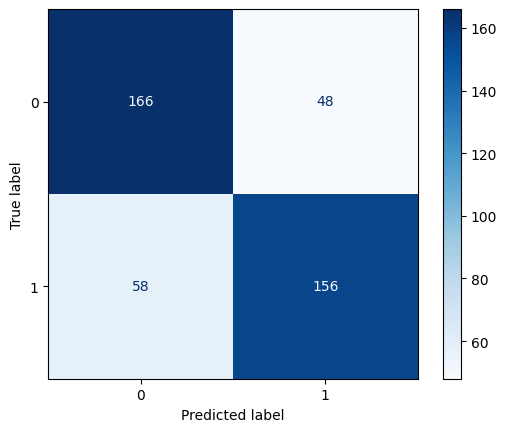

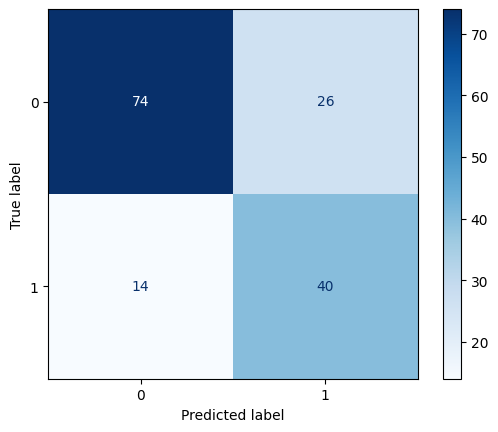

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Training data confusion matrix
y_pred = best_model.predict(X_usampled)
cm = confusion_matrix(y_usampled, y_pred, labels = best_model.classes_)
plt = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
plt.plot(cmap = "Blues");

## Test data confusion matrix
y_pred = best_model.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred, labels = best_model.classes_)
plt = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_model.classes_)
plt.plot(cmap = "Blues");

Calculate the accuracy of the trained model using the Confusion Matrix values and compare it with the accuracy generated from the internal function. Ideally, both the accuracies should be the same. Also, calculate the accuracy of the test dataset.


In [17]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

accuracy = (TN + TP)/(TN + FP + FN + TP) 
print(accuracy)

# Model Performance (Accuracy) of the training data
accuracy_train = best_model.score(X_usampled, y_usampled)

# Model Performance (Accuracy) of the test data
accuracy_test = best_model.score(X_test, y_test)

print('Training Dataset Accuracy: ' + str(accuracy_train), ', Test Dataset Accuracy: ' + str(accuracy_test))

0.7523364485981309
Training Dataset Accuracy: 0.7523364485981309 , Test Dataset Accuracy: 0.7402597402597403


In [18]:
# Finally, let us check the F1 Score performance metric of the trained model on both under-sampled training data and test dataset.
y_pred = best_model.predict(X_usampled)
f1_train = f1_score(y_pred, y_usampled)

y_pred = best_model.predict(X_test)
f1_test = f1_score(y_pred, y_test)

print('Training Dataset F1 Score: ' + str(f1_train), ', Test Dataset F1 Score: ' + str(f1_test))

Training Dataset F1 Score: 0.7464114832535885 , Test Dataset F1 Score: 0.6666666666666666


In this exercise, we have learned how to under-sample the data and find the best hyperparameters of a model using the ‘GridSearchCV’ function. We have used the best hyperparameters to train the model and then check the performance of the trained model on the under-sampled training data and test dataset. If the performance on both training and test dataset is similar then we can consider that the trained model is robust.